In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import pandas as pd

import numpy.random as npr

from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import matplotlib.dates as mdates
from datetime import datetime, date, timedelta
from scipy import optimize
from scipy import stats

import QuantLib as ql
%matplotlib inline

In [2]:
dir       = 'data/'
file_name = 'grid1_zheb51fo.xlsx'
UX1       = pd.read_excel(dir+file_name, sheet_name='UX1_Index')
UX2       = pd.read_excel(dir+file_name, sheet_name='UX2_Index')

UX1       = UX1.set_index('Date')
UX2       = UX2.set_index('Date')

UX1

,PX_LAST,PX_VOLUME
Date,,
2022-01-18,21.7800,5655
2022-01-17,NaN,0
2022-01-14,21.7462,102849
2022-01-13,22.0944,82700
2022-01-12,20.9713,76675
...,...,...
2010-01-08,22.5500,2050
2010-01-07,23.1500,1760
2010-01-06,23.5500,1958


Historical data of SPX price found at https://www.wsj.com/market-data/quotes/index/SPX/historical-prices

In [3]:
file_name = 'SPX_HistoricalData.csv'
SPX_price = pd.read_csv(dir+file_name)
SPX_price['Date']                             = pd.to_datetime(SPX_price['Date'],format='%m/%d/%y')
SPX_price                                     = SPX_price.set_index('Date')
SPX_price.sort_index(inplace=True)
SPX_price

,Open,High,Low,Close
Date,,,,
2010-04-01,1171.23,1181.43,1170.69,1178.10
2010-04-05,1178.71,1187.73,1178.71,1187.44
2010-04-06,1186.01,1191.80,1182.77,1189.44
2010-04-07,1188.23,1189.60,1177.25,1182.45
2010-04-08,1181.75,1188.55,1175.12,1186.44
...,...,...,...,...
2022-01-10,4655.34,4673.02,4582.24,4670.29
2022-01-11,4669.14,4714.13,4638.27,4713.07
2022-01-12,4728.59,4748.83,4706.71,4726.35


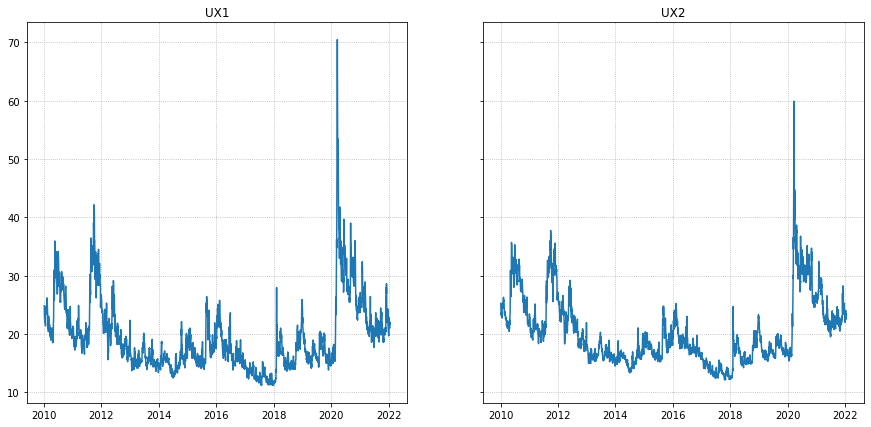

In [4]:
fig,ax = plt.subplots(ncols=2, figsize=(15,7), sharey=True)
ax[0].plot(UX1.index, UX1.PX_LAST)
ax[1].plot(UX2.index, UX2.PX_LAST)
ax[0].set_title('UX1')
ax[1].set_title('UX2')
ax[0].grid(linestyle='dotted')
ax[1].grid(linestyle='dotted')
plt.show()

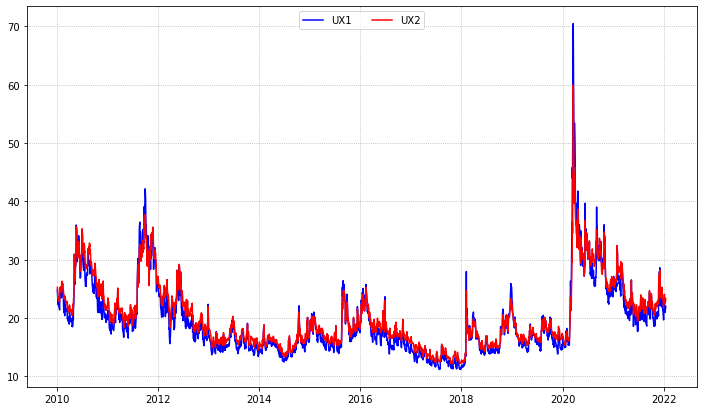

In [5]:
fig,ax = plt.subplots(figsize=(12,7))
ax.plot(UX1.index, UX1.PX_LAST, label='UX1', color='blue')
ax.plot(UX2.index, UX2.PX_LAST, label='UX2', color='red')
ax.legend(loc='upper center', ncol=2)
ax.grid(linestyle='dotted')
plt.show()

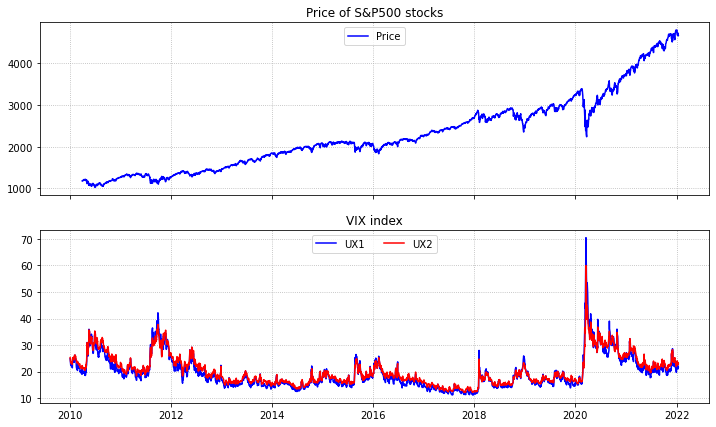

In [6]:
fig,ax = plt.subplots(nrows=2,figsize=(12,7), sharex=True)
ax[0].plot(SPX_price.index, SPX_price.Close, label='Price', color='blue')
ax[0].legend(loc='upper center', ncol=2)
ax[0].grid(linestyle='dotted')
ax[0].set_title('Price of S&P500 stocks')

ax[1].plot(UX1.index, UX1.PX_LAST, label='UX1', color='blue')
ax[1].plot(UX2.index, UX2.PX_LAST, label='UX2', color='red')
ax[1].legend(loc='upper center', ncol=2)
ax[1].grid(linestyle='dotted')
ax[1].set_title('VIX index')
plt.show()

## Black-Scholes Model

In [7]:
SPX_price['LogReturn'] = np.log(SPX_price['Close']/SPX_price['Close'].shift(1))

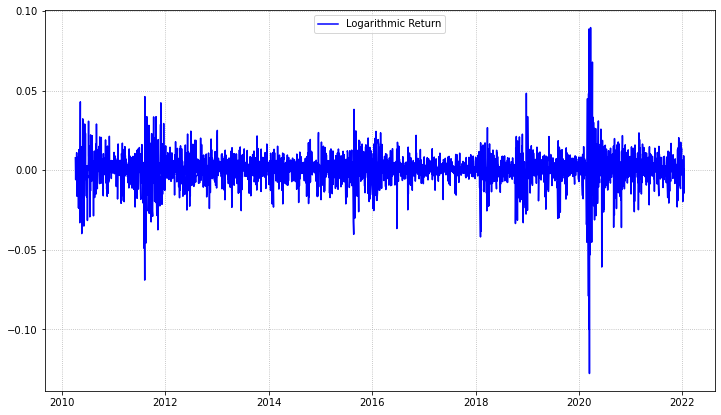

In [8]:
fig,ax = plt.subplots(figsize=(12,7))
ax.plot(SPX_price.index, SPX_price.LogReturn, label='Logarithmic Return', color='blue')
ax.legend(loc='upper center', ncol=2)
ax.grid(linestyle='dotted')
#ax.set_title('Price of S&P500 stocks')
plt.show()

Expected return:		0.1257
Volatility:     		0.0155


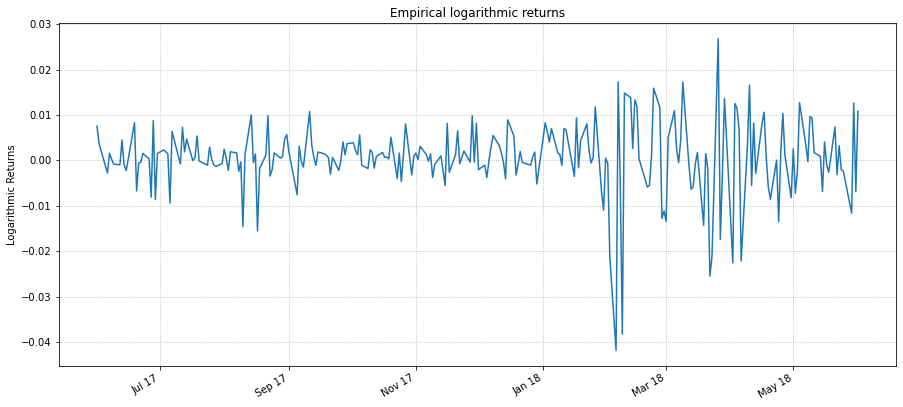

In [9]:
start             = '2017-06-01'
stop              = '2018-06-01'
mask              = (SPX_price.index >= start) & (SPX_price.index <= stop)
SPX_price_window1 = SPX_price[mask]
dt                = 1/SPX_price_window1.shape[0]
Expected_Return   = (2*SPX_price_window1['LogReturn'].mean() + 2*SPX_price_window1['LogReturn'].var()*dt) / (2*dt)
Volatility        = SPX_price_window1['LogReturn'].var()/dt

print('Expected return:\t\t%.4f'% Expected_Return)
print('Volatility:     \t\t%.4f'% Volatility)

fig, ax          = plt.subplots(figsize=(15,7))
SPX_price_window1['LogReturn'].plot(ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Logarithmic Returns')
ax.set_title('Empirical logarithmic returns')
ax.grid(linestyle='dotted')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b %y"))
plt.show()

R2 			=		 0.9427268966012181 
R 			=		 0.9709412426100861

Covariance matrix:
 [[1.         0.25517984]
 [0.25517984 1.        ]]

n degrees of freedom 	=		 10

chi2 			=		 139.37028213530783
p-value 		=		 0.0


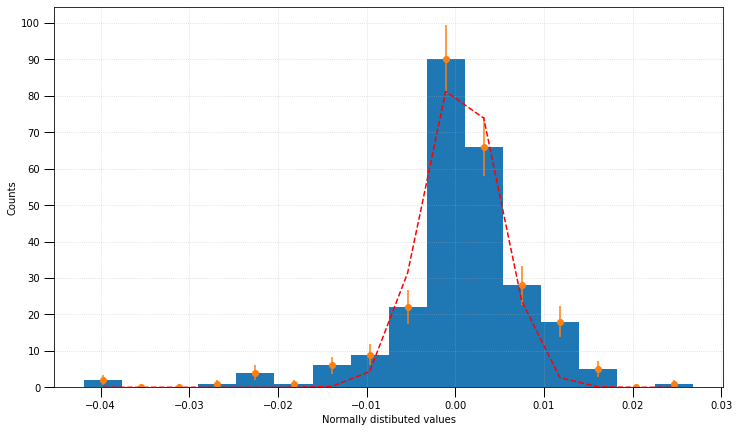

In [10]:
b                 = np.histogram_bin_edges(SPX_price_window1.LogReturn.dropna(), bins='sqrt')
fig, ax           = plt.subplots(figsize=(12, 7))
entries, edges, _ = ax.hist(SPX_price_window1.LogReturn, bins=b)
ax.set_ylabel('Counts')
ax.set_xlabel("Normally distibuted values")
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.grid(linestyle='dotted', alpha=0.5)

# calculate bin centers
bin_centers = 0.5 * (edges[:-1] + edges[1:])

# draw errobars, use the sqrt error. You can use what you want there
# poissonian 1 sigma intervals would make more sense
ax.errorbar(bin_centers, entries, yerr=np.sqrt(entries), fmt='o')

def gaussian(x, N, mu, sig):
    return N * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

popt, pcov = optimize.curve_fit(gaussian, bin_centers, entries, p0 = [100,Expected_Return, Volatility])
ax.plot(bin_centers, gaussian(bin_centers, popt[0],popt[1],popt[2]), linestyle='dashed',c = 'r' )

ssr = np.sum((entries - gaussian(bin_centers, popt[0],popt[1],popt[2]))**2)
tss = np.sum((np.mean(entries) - entries)**2)

rsq = 1 - ssr / tss
sigma_y  = np.sqrt(np.abs(entries))
mask_err = (sigma_y!=0)

print("R2 \t\t\t=\t\t", rsq, "\nR \t\t\t=\t\t", np.sqrt(rsq))
print("\nCovariance matrix:\n", np.corrcoef(bin_centers,entries)) # check with the correlation matrix that R is the correlation coefficient

ndof = len(bin_centers[mask_err]) - 3
print("\nn degrees of freedom \t=\t\t", ndof)
# calculate the chi^2
chi2 = np.sum(((entries[mask_err] - (gaussian(bin_centers[mask_err], popt[0],popt[1],popt[2])))**2) / sigma_y[mask_err])
print("\nchi2 \t\t\t=\t\t", chi2)
# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value \t\t=\t\t", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory

In [11]:
n                 = 4 # number of simulated paths

start             = '2018-06-01'
stop              = '2019-06-01'
mask              = (SPX_price.index >= start) & (SPX_price.index <= stop)
SPX_price_window2 = SPX_price[mask]

z                 = np.sqrt(dt) * npr.normal(0,1,(n, SPX_price_window2.shape[0])) # stochastic variable
S0                = SPX_price_window2.loc[start,'Close']

for k in range(n):
    col = 'Price_Sim'+str(k)
    xt = np.array([0])
    for i in range(SPX_price_window2.shape[0]-1):
        xt = np.append(xt, xt[i] + (Expected_Return - Volatility**2/2)*dt + Volatility*(z[k][i+1]+z[k][i])) # not sure about this (if it is + or -)

    SPX_price_window2[col] = np.exp(xt)*S0

/tmp/ipykernel_221962/3693761083.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPX_price_window2[col] = np.exp(xt)*S0


Text(0.5, 1.0, 'Price of S&P500 stocks')

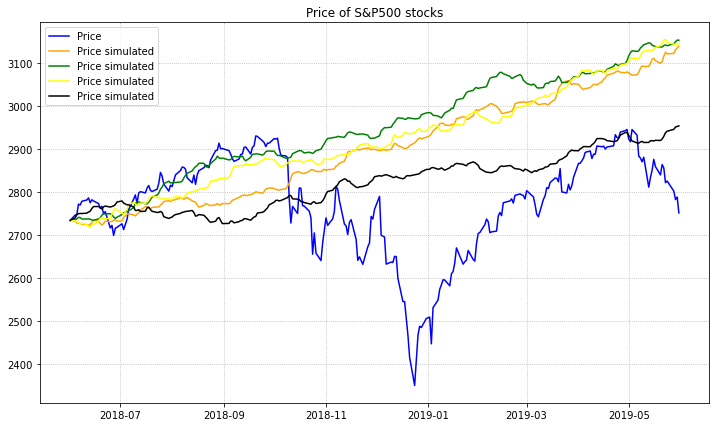

In [12]:
fig,ax = plt.subplots(figsize=(12,7))
ax.plot(SPX_price_window2.index, SPX_price_window2.Close, label='Price', color='blue')
ax.plot(SPX_price_window2.index, SPX_price_window2.Price_Sim0, label='Price simulated', color='orange')
ax.plot(SPX_price_window2.index, SPX_price_window2.Price_Sim1, label='Price simulated', color='green')
ax.plot(SPX_price_window2.index, SPX_price_window2.Price_Sim2, label='Price simulated', color='yellow')
ax.plot(SPX_price_window2.index, SPX_price_window2.Price_Sim3, label='Price simulated', color='black')
ax.legend(loc='upper left')
ax.grid(linestyle='dotted')
ax.set_title('Price of S&P500 stocks')

## Heston Model

In [113]:
# historical data for estimation of parameters
start             = '2017-10-01'
stop              = '2017-11-01'
mask              = (UX1.index >= start) & (UX1.index < stop)
UX1_window1       = UX1[mask]
UX2_window1       = UX2[mask]

# 'future' data to compare with
start             = '2017-11-01'
stop              = '2017-12-01'
mask              = (UX1.index >= start) & (UX1.index < stop)
UX1_window2       = UX1[mask]
UX2_window2       = UX2[mask]

# 'future' prices
start             = '2017-11-01'
stop              = '2017-12-01'
mask              = (SPX_price.index >= start) & (SPX_price.index < stop)
SPX_price_window2 = SPX_price[mask]

In [114]:
# 'today' price and volatility
S0    = SPX_price_window2.loc[start,   'Close']
UX10  = UX1_window2.loc[      start, 'PX_LAST']
UX20  = UX2_window2.loc[      start, 'PX_LAST']

Vt    = UX1_window1.PX_LAST.values**2
# parameters
delta = 1 # don't know how to find it

# according to bibliography/parameters_estimation.pdf
n     = len(Vt)

P     = (1/n   *sum((Vt[i]*Vt[i-1])**.5 for i in range(1,n)) -
         1/n**2*sum((Vt[i]/Vt[i-1])**.5 for i in range(1,n)) *
         sum(Vt[i-1] for i in range(1,n))) / (delta/2 - delta/(2*n**2) * sum(Vt[i-1] for i in range(1,n)))

k     = 2/delta * (1 + P*delta/(2*n)*sum(1/Vt[i-1] for i in range(1,n)) -
                   1/n*sum((Vt[i]/Vt[i-1])**0.5    for i in range(1,n)))

sigma = (4/(delta*n)*sum(Vt[i]**.5 - Vt[i-1]**.5 -
                         delta/(2*Vt[i-1]**.5)*(P-k*Vt[i-1]) for i in range(1,n)))**.5

theta = (P+sigma**2/2)/k

rho   = -.7890 # don't know how to find it
r     = 2.17 # don't know how to find it

e1    = npr.normal(0,1,(SPX_price_window2.shape[0],1))
e2    = npr.normal(0,1,(SPX_price_window2.shape[0],1))
eV    = e1
eS    = rho*e1 + np.sqrt(1-rho**2)*e2

T      = 1
Npaths = 10
steps  = 252

In [115]:
def heston_pde(  S,   T,     r,     k,  theta,
               v_0, rho, sigma, steps, Npaths):
    dt         = T/steps
    size       = (Npaths, steps)
    prices     = np.zeros(size)
    volatility = np.zeros(size)
    S_t        = np.full(Npaths,   S)
    v_t        = np.full(Npaths, v_0)
    for t in range(steps):
        WT = np.sqrt(dt) * np.random.multivariate_normal(np.array( [0,  0]),
                                                         np.array([[1,rho],
                                                                   [rho,1]]),
                                                         size=Npaths)
        S_t         = S_t*np.exp(    (r - 0.5*v_t)*dt +       np.sqrt(v_t)*WT[:,0])
        v_t         = np.abs(v_t + k*(theta - v_t)*dt + sigma*np.sqrt(v_t)*WT[:,1])

        prices[    :,t] = S_t
        volatility[:,t] = v_t

    return prices, volatility



prices, volatility = heston_pde(S0, T, r, k, theta, UX10, rho, sigma, steps, Npaths)

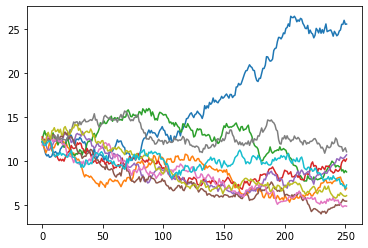

In [116]:
for i in range(10):
    plt.plot(volatility[i])

<AxesSubplot:xlabel='Date'>

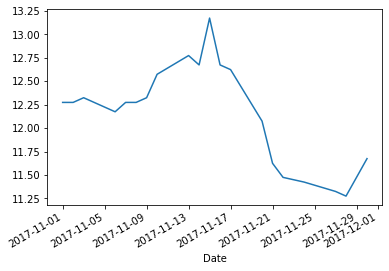

In [117]:
UX1_window2.PX_LAST.plot()

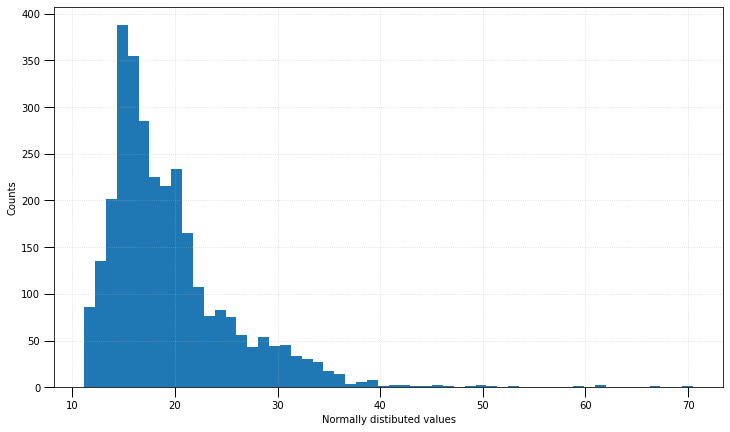

In [118]:
b                 = np.histogram_bin_edges(UX1.PX_LAST.dropna(), bins='sqrt')
fig, ax           = plt.subplots(figsize=(12, 7))
entries, edges, _ = ax.hist(UX1.PX_LAST, bins=b)
ax.set_ylabel('Counts')
ax.set_xlabel("Normally distibuted values")
ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.grid(linestyle='dotted', alpha=0.5)
plt.show()